# <center> Diffusion Processes on Complex Networks </center>
## <center> Roman Furman 255909 </center>

In [51]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [41]:
def q_voter_model(N, q, p, graph):
    """
    Simulate the q-voter model with NN influence group.
    
    Parameters:
    - N: Number of agents
    - q: Number of agents each agent interacts with
    - p: Independence factor
    - graph: Network graph
    
    Returns:
    - magnetization: List of magnetization values over time
    """
    # Initialize agents with random opinions
    opinions = np.random.choice([-1, 1], N)
    
    # Perform Monte Carlo steps
    magnetization = []
    for _ in range(1000):
        # Choose a random agent
        agent = np.random.randint(N)
        
        # Find the neighbors of the agent
        neighbors = list(graph.neighbors(agent))
        
        # Check if the number of neighbors is less than q
        if len(neighbors) < q:
            q_neighbors = np.random.choice(neighbors, len(neighbors), replace=False)
        else:
            q_neighbors = np.random.choice(neighbors, q, replace=False)
        
        # Determine the probability of changing opinion
        q_neighbors_opinions = opinions[q_neighbors]
        same_opinions = np.sum(q_neighbors_opinions == opinions[agent])
        p_same = same_opinions / q
        
        # Decide whether to change opinion based on p
        if np.random.random() < p * p_same + (1 - p) * (1 - p_same):
            opinions[agent] = np.random.choice(q_neighbors_opinions)
        
        # Calculate magnetization (fraction of agents with opinion +1)
        magnetization.append(np.sum(opinions == 1) / N)
    
    return magnetization


### Average Final Magnetization for Different Network Topologies and q Values

In [43]:
# Define the networks
N = 100
networks = {
    "Complete Graph": nx.complete_graph(N),
    "BA(100,4)": nx.barabasi_albert_graph(N, 4),
    "WS(100,4,0.01)": nx.watts_strogatz_graph(N, 4, 0.01),
    "WS(100,4,0.2)": nx.watts_strogatz_graph(N, 4, 0.2)
}

# Define the parameter values
q_values = [3, 4]
p_values = np.arange(0.0, 0.52, 0.02)

# Perform simulations
magnetization_results = []

for network_name, network in networks.items():
    for q in q_values:
        for p in tqdm(p_values, desc=f"Network: {network_name}, q={q}"):
            magnetization_avg = 0

            for _ in range(100):
                # Check if the number of neighbors is less than q
                if len(network) < q:
                    q = len(network) - 1

                magnetization = q_voter_model(N, q, p, network)
                magnetization_avg += magnetization[-1]  # Use the final magnetization

            magnetization_avg /= 100
            magnetization_results.append((network_name, q, p, magnetization_avg))

# Print the magnetization results
for network_name, q, p, magnetization_avg in magnetization_results:
    print(f"Network: {network_name}, q={q}, p={p}, magnetization_avg={magnetization_avg}")


Network: WS(100,4,0.2), q=4: 100%|████████████████| 26/26 [01:10<00:00,  2.71s/it]

Network: Complete Graph, q=3, p=0.0, magnetization_avg=0.5024999999999998
Network: Complete Graph, q=3, p=0.02, magnetization_avg=0.5124000000000002
Network: Complete Graph, q=3, p=0.04, magnetization_avg=0.5797999999999999
Network: Complete Graph, q=3, p=0.06, magnetization_avg=0.4722000000000001
Network: Complete Graph, q=3, p=0.08, magnetization_avg=0.4326000000000001
Network: Complete Graph, q=3, p=0.1, magnetization_avg=0.5033000000000001
Network: Complete Graph, q=3, p=0.12, magnetization_avg=0.5037999999999997
Network: Complete Graph, q=3, p=0.14, magnetization_avg=0.5237999999999999
Network: Complete Graph, q=3, p=0.16, magnetization_avg=0.5363
Network: Complete Graph, q=3, p=0.18, magnetization_avg=0.5381
Network: Complete Graph, q=3, p=0.2, magnetization_avg=0.5009999999999998
Network: Complete Graph, q=3, p=0.22, magnetization_avg=0.5206000000000001
Network: Complete Graph, q=3, p=0.24, magnetization_avg=0.5474000000000001
Network: Complete Graph, q=3, p=0.26, magnetization_

The calculation performed in the code snippet aims to simulate the q-voter model for different network topologies, q values, and independence factor (p) values. Here's a description of the calculation and the printed results:

The code begins by defining the network topologies: a complete graph, BA(100,4) (Barabasi-Albert graph), WS(100,4,0.01) (Watts-Strogatz graph with rewiring probability 0.01), and WS(100,4,0.2) (Watts-Strogatz graph with rewiring probability 0.2). These networks will serve as the underlying topologies for social interactions.

Next, the parameter values are defined: q_values = [3, 4] represents the number of agents each agent interacts with, and p_values = np.arange(0.0, 0.52, 0.02) defines a range of independence factor values from 0.0 to 0.5 (inclusive) with a step size of 0.02.

The simulations are performed using nested loops. For each network topology, q value, and p value combination, the code uses tqdm to display a progress bar indicating the simulation progress. Within each iteration, the magnetization is averaged over 100 independent runs. If the number of neighbors is less than q, the code adjusts q to be one less than the number of neighbors.

The calculated magnetization averages are stored in the magnetization_results list as tuples containing the network name, q value, p value, and magnetization average.

Finally, the code prints the magnetization results for each network topology, q value, p value, and the corresponding magnetization average. The printed results provide information about the average final magnetization for different parameter combinations.

Please note that the code assumes the availability of the q_voter_model function defined earlier in the notebook.

### Time Evolution of Magnetization for the WS(100,4,0.01) Network

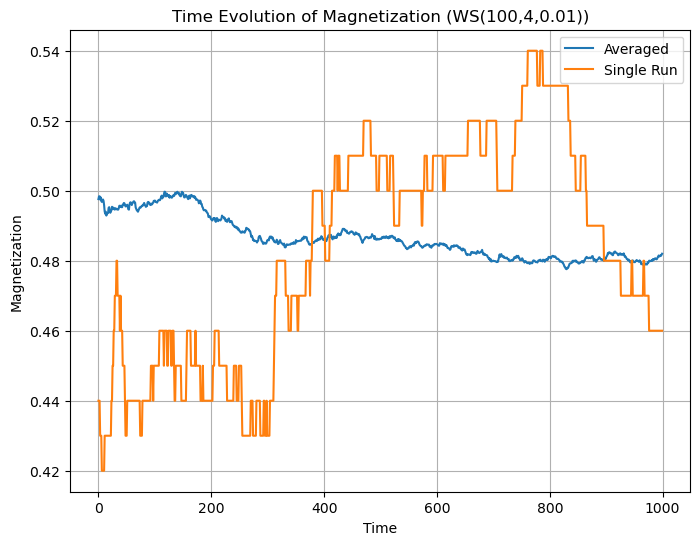

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
N = 100  # Number of agents
q = 3    # Number of agents each agent interacts with
p = 0.1  # Independence factor

# Generate the Watts-Strogatz graph
graph = nx.watts_strogatz_graph(N, 4, 0.01)

# Perform the simulation
magnetization_avg = np.zeros(1000)
magnetization_single = q_voter_model(N, q, p, graph)

for _ in range(100):
    magnetization = q_voter_model(N, q, p, graph)
    magnetization_avg += magnetization

magnetization_avg /= 100

# Plot the time evolution of magnetization
time = np.arange(1000)

plt.figure(figsize=(8, 6))
plt.plot(time, magnetization_avg, label='Averaged')
plt.plot(time, magnetization_single, label='Single Run')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.title('Time Evolution of Magnetization (WS(100,4,0.01))')
plt.legend()
plt.grid(True)
plt.show()


This plot showcases the time evolution of magnetization for the q-voter model with the WS(100,4,0.01) network topology. The parameters used are N = 100 (number of agents), q = 3 (number of agents each agent interacts with), and p = 0.1 (independence factor).

The plot includes two curves: "Averaged" and "Single Run." The "Averaged" curve represents the average magnetization calculated over 100 independent simulation runs. The "Single Run" curve represents the magnetization obtained from a single simulation run.

The x-axis denotes time, ranging from 0 to 1000 Monte Carlo steps, while the y-axis represents the magnetization, indicating the fraction of agents with opinion +1.

The plot provides insights into how the magnetization evolves over time for the q-voter model with the WS(100,4,0.01) network. It allows observation of any convergence or fluctuations in the magnetization and provides a comparison between the averaged behavior and that of a single simulation run.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the parameters
N = 100  # Number of agents
q_values = [3, 4]  # Values of q
p_values = np.arange(0.0, 0.52, 0.02)  # Values of p

# Define the network topologies
networks = {
    "Complete Graph": nx.complete_graph(N),
    "BA(100,4)": nx.barabasi_albert_graph(N, 4),
    "WS(100,4,0.01)": nx.watts_strogatz_graph(N, 4, 0.01),
}

# Calculate average final magnetization for different scenarios
magnetization_avg = np.zeros((len(q_values), len(networks), len(p_values)))

for i, q in enumerate(q_values):
    for j, network_name in enumerate(networks):
        network = networks[network_name]
        for k, p in enumerate(tqdm(p_values, desc=f"q = {q}, Network: {network_name}")):
            magnetization = np.zeros(100)
            for _ in range(100):
                magnetization_single = q_voter_model(N, q, p, network)
                magnetization[_] = magnetization_single[-1]
            magnetization_avg[i, j, k] = np.mean(magnetization)

q = 4, Network: WS(100,4,0.01): 100%|█████████████| 26/26 [01:09<00:00,  2.66s/it]


### Average Final Magnetization as a function of Independence Factor (p) for q = 3 and Different Network Topologies

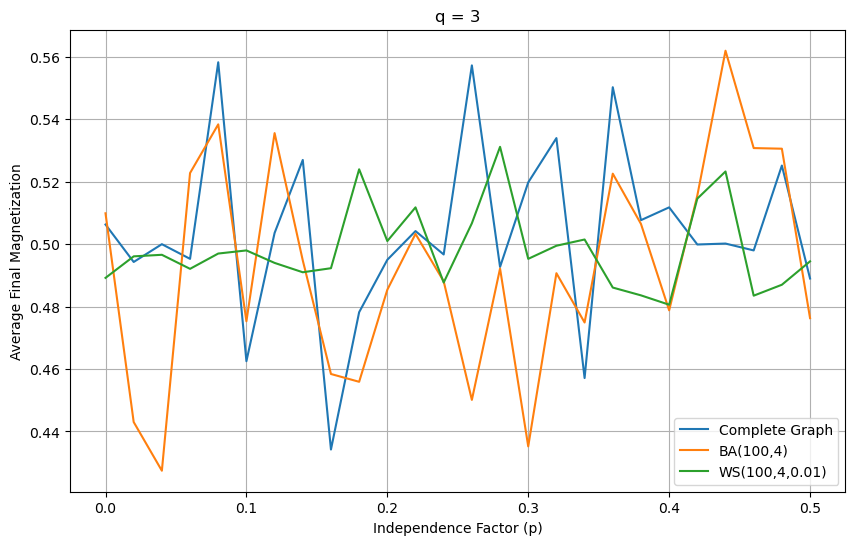

In [48]:
# Plot average final magnetization as a function of p for q = 3 and different network topologies
plt.figure(figsize=(10, 6))
for j, network_name in enumerate(networks):
    plt.plot(p_values, magnetization_avg[0, j], label=network_name)
plt.xlabel('Independence Factor (p)')
plt.ylabel('Average Final Magnetization')
plt.title('q = 3')
plt.legend()
plt.grid(True)
plt.show()

This plot illustrates the average final magnetization as a function of the independence factor (p) for a q-voter model with q = 3 and different network topologies. The network topologies considered are the Complete Graph, BA(100,4), and WS(100,4,0.01). The independence factor (p) ranges from 0.0 to 0.5 with a step size of 0.02. The average final magnetization represents the average fraction of agents with opinion +1 after 1000 Monte Carlo steps. Each curve represents a different network topology, and the plot provides insights into how the independence factor influences the final magnetization for q = 3.

### Average Final Magnetization as a function of Independence Factor (p) for q = 4 and Different Network Topologies

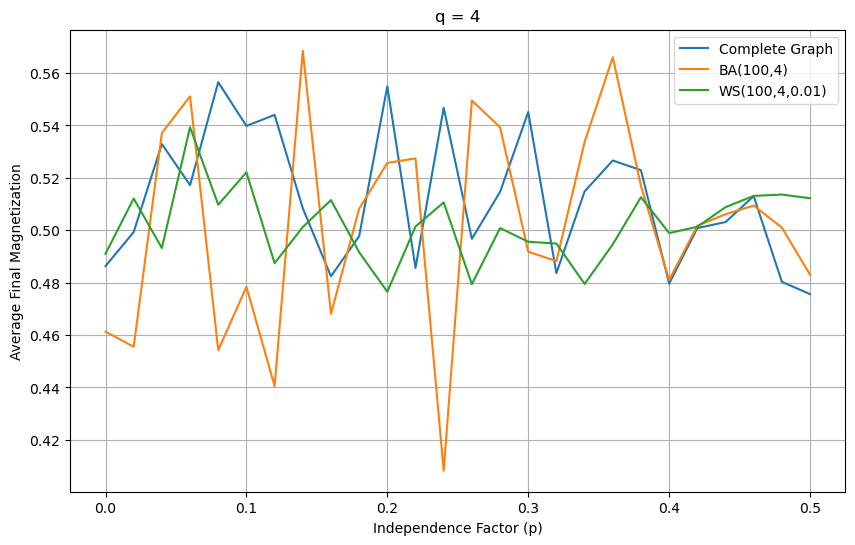

In [49]:
# Plot average final magnetization as a function of p for q = 4 and different network topologies
plt.figure(figsize=(10, 6))
for j, network_name in enumerate(networks):
    plt.plot(p_values, magnetization_avg[1, j], label=network_name)
plt.xlabel('Independence Factor (p)')
plt.ylabel('Average Final Magnetization')
plt.title('q = 4')
plt.legend()
plt.grid(True)
plt.show()

This plot depicts the average final magnetization as a function of the independence factor (p) for a q-voter model with q = 4 and various network topologies. Similar to the previous plot, the network topologies considered are the Complete Graph, BA(100,4), and WS(100,4,0.01). The independence factor (p) ranges from 0.0 to 0.5 with a step size of 0.02. The average final magnetization is calculated as the average fraction of agents with opinion +1 after 1000 Monte Carlo steps. Each curve corresponds to a different network topology, enabling an examination of the influence of the independence factor on the final magnetization for q = 4.

### Average Final Magnetization as a function of Independence Factor (p) for WS(100,4,0.01) Network and Different Values of q

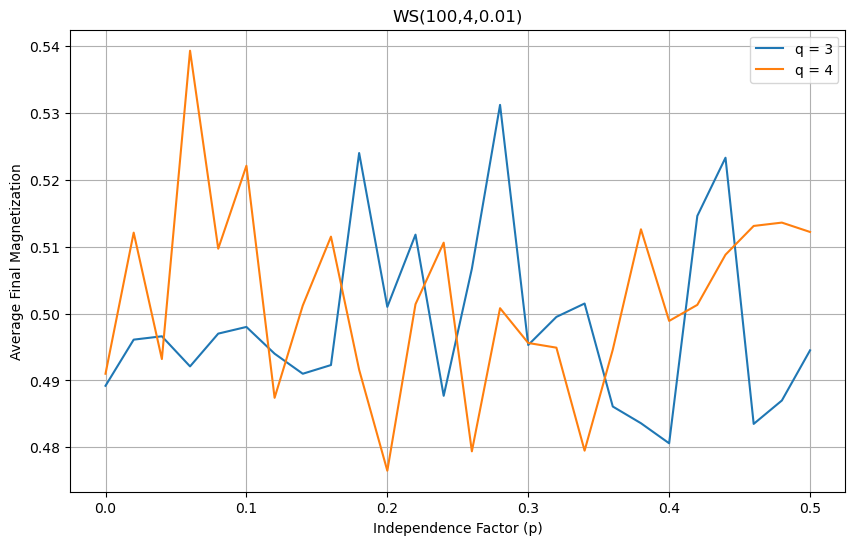

In [50]:
# Plot average final magnetization as a function of p for WS(100,4,0.01) network and different values of q
plt.figure(figsize=(10, 6))
for i, q in enumerate(q_values):
    plt.plot(p_values, magnetization_avg[i, 2], label=f'q = {q}')
plt.xlabel('Independence Factor (p)')
plt.ylabel('Average Final Magnetization')
plt.title('WS(100,4,0.01)')
plt.legend()
plt.grid(True)
plt.show()

This plot showcases the average final magnetization as a function of the independence factor (p) for a q-voter model with the WS(100,4,0.01) network topology and varying values of q. The considered values of q are 3 and 4. The independence factor (p) ranges from 0.0 to 0.5 with a step size of 0.02. The average final magnetization is computed as the average fraction of agents with opinion +1 after 1000 Monte Carlo steps. Each curve represents a different value of q, allowing an examination of how the independence factor impacts the final magnetization for the specific WS(100,4,0.01) network topology.